# AGU Preparations

In [1]:
# load packages
library(ggplot2)
library(dplyr)
library(mvtnorm)
library(tidyverse)
library(data.table)
library(gridExtra)
library(knitr)

# load perlmutter scratch filepath signature
perlpath <- Sys.getenv('PSCRATCH')

# load self-made functions
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
source('~/isolines_uq/scripts/R/auxiliary_scripts/projection.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/utils.R')
source('~/isolines_uq/scripts/R/confidence_regions_procedure/confidenceRegions.R')

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_c

## Introductory Figure Showing What We Want

### What even is an isoline?

In [2]:
demo_dat <- data.frame(rmvt(10000, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
p <- 0.001
gridUbs <- c(10,10)
gridLbs <- c(-2,-2)
isoline <- drawBivtIsoline(500, gridUbs, gridLbs, p)

In [3]:
point <- as.numeric(isoline[200,])

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Saving 6.67 x 6.67 in image


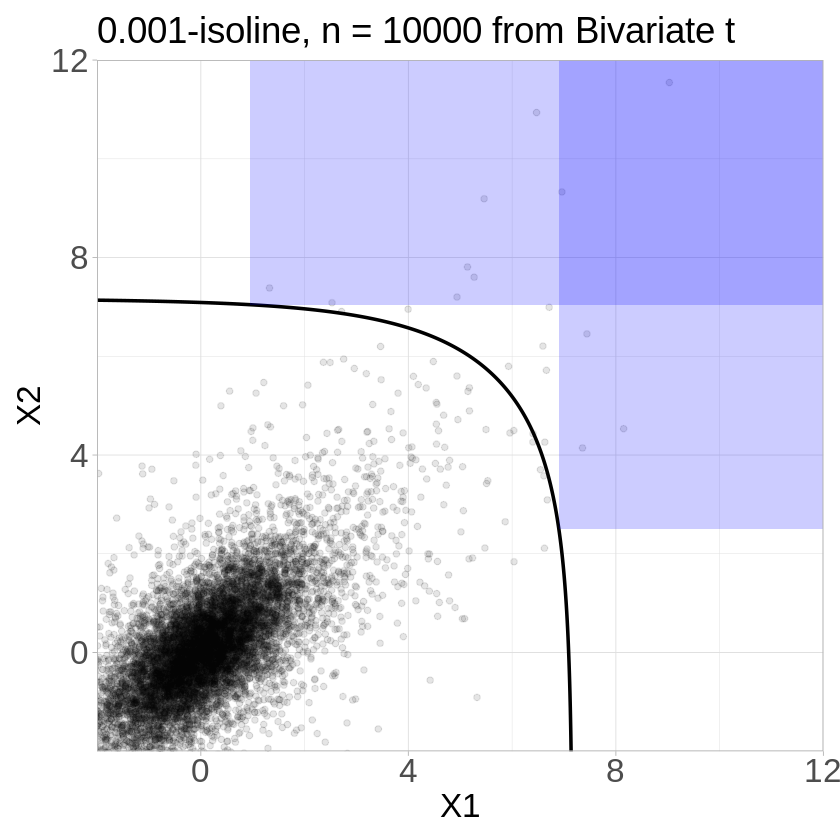

In [4]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

plt <- ggplot() + geom_point(data=demo_dat, aes(x=X1, y=X2), alpha=0.1) + geom_line(data=isoline, aes(x=X1, y=X2), col='black', size=1) +
coord_cartesian(ylim=c(-2, 12), xlim = c(-2, 12), expand=0) +
annotate("rect", fill = "blue", alpha = 0.2, 
        xmin = as.numeric(isoline[150,])[1], xmax = 12,
        ymin = as.numeric(isoline[150,])[2], ymax = 12) +
annotate("rect", fill = "blue", alpha = 0.2, 
        xmin = as.numeric(isoline[400,])[1], xmax = 12,
        ymin = as.numeric(isoline[400,])[2], ymax = 12) +
theme_light() +
ggtitle('0.001-isoline, n = 10000 from Bivariate t') +
theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=22),
      plot.margin = margin(10, 10, 10, 10))

plt
ggsave('~/isolines_uq/plots/iso_demo.png', plt)

In [423]:
#using karachi temperature and humidity data
load('~/isolines_uq/data/cooley_data/karachiDatDaily.Rdata')
karachi_data <- karachiDatDaily[,c(3,4)]
colnames(karachi_data) <- c('X1', 'X2')

In [424]:
lbs <- c(50, 0)
ubs <- c(140, 100)
gticks <- 400 
grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

surv_func <- fastEmpSurv(grid, karachi_data)
p <- 0.01
q <- 0.0005
tol <- 0.0002
p_isoline <- grid[surv_func <= p + tol & surv_func >= p - tol,]
q_isoline <- projectContour(contour=p_isoline, dat=karachi_data, base_p=p, proj_p=q, mar1Prop=0.03, mar2Prop=0.03, mar1Width=0.01, mar2Width=0.01,
                              asympIndep=TRUE, etaProp = 0.02, beta=NULL)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


### What Previous Work Gives Us

Saving 6.67 x 6.67 in image


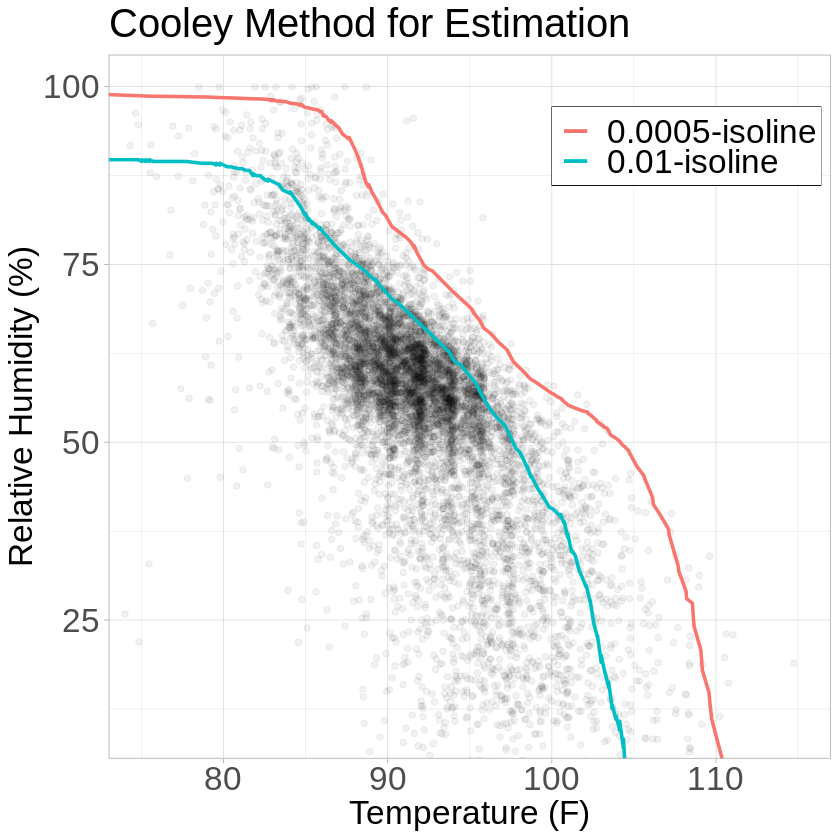

In [425]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

plt <- ggplot() + geom_point(data=karachi_data, aes(x=X1, y=X2), alpha = 0.05) + 
geom_line(data=p_isoline, aes(x=X1, y=X2, color='0.01-isoline'), size=1) + 
geom_line(data=q_isoline, aes(x=X1, y=X2, color='0.0005-isoline'), size=1) + 
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115)) + 
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + 
ggtitle('Cooley Method for Estimation') +
theme_light() +
theme(legend.position = c(0.80, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20))

plt
ggsave('~/isolines_uq/plots/cooley_demo.png', plt)

### What we Want

In [426]:
grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

base_out <- drawBaseRegions(karachi_data, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)
base_out <- base_out[[1]]

In [427]:
proj_out <- projectBaseRegion(base_out, proj_p=q, asympIndep=TRUE)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Saving 6.67 x 6.67 in image


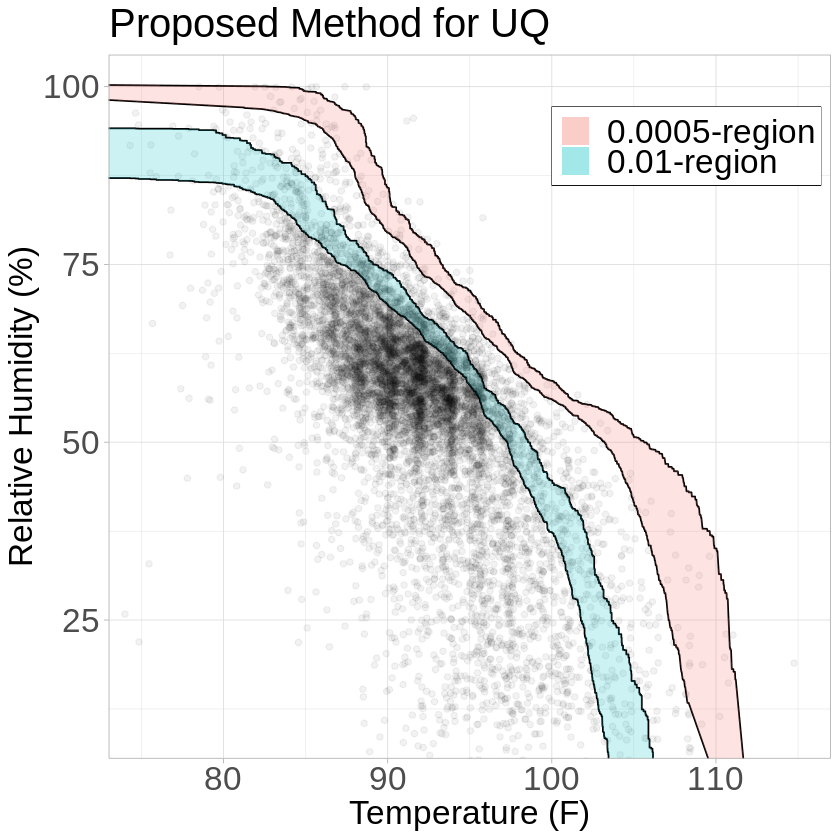

In [428]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon1 <- rbind(base_out[[1]], 
                 data.frame(t(rev(data.frame(t(base_out[[2]]))))))
polygon2 <- rbind(proj_out[[3]], 
                 data.frame(t(rev(data.frame(t(proj_out[[4]]))))))

n <- nrow(base_out$data)
p <- base_out$p
alpha <- base_out$alpha

plt <- ggplot() + geom_point(data=base_out$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=base_out[[1]], aes(x=X1, y=X2)) +
geom_line(data=base_out[[2]], aes(x=X1, y=X2)) +
geom_line(data=proj_out[[3]], aes(x=X1, y=X2)) +
geom_line(data=proj_out[[4]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='0.01-region'), alpha=0.2) +
geom_polygon(data=polygon2, aes(x=X1, y=X2, fill='0.0005-region'), alpha=0.2) +
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115)) +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + 
ggtitle('Proposed Method for UQ') +
theme_light() +
theme(legend.position = c(0.80, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20))

plt
ggsave('~/isolines_uq/plots/proposed_demo.png', plt)

## Example of Failed Cover and Successful Cover

### Successful Cover

In [391]:
ind <- 110
path <- paste0(perlpath, '/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/5000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.05_alpha0.05'
isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(5,5), gridLbs=c(-2,-2), prob=0.05)

Warning message:
“Removed 464 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 464 rows containing missing values (`geom_point()`).”


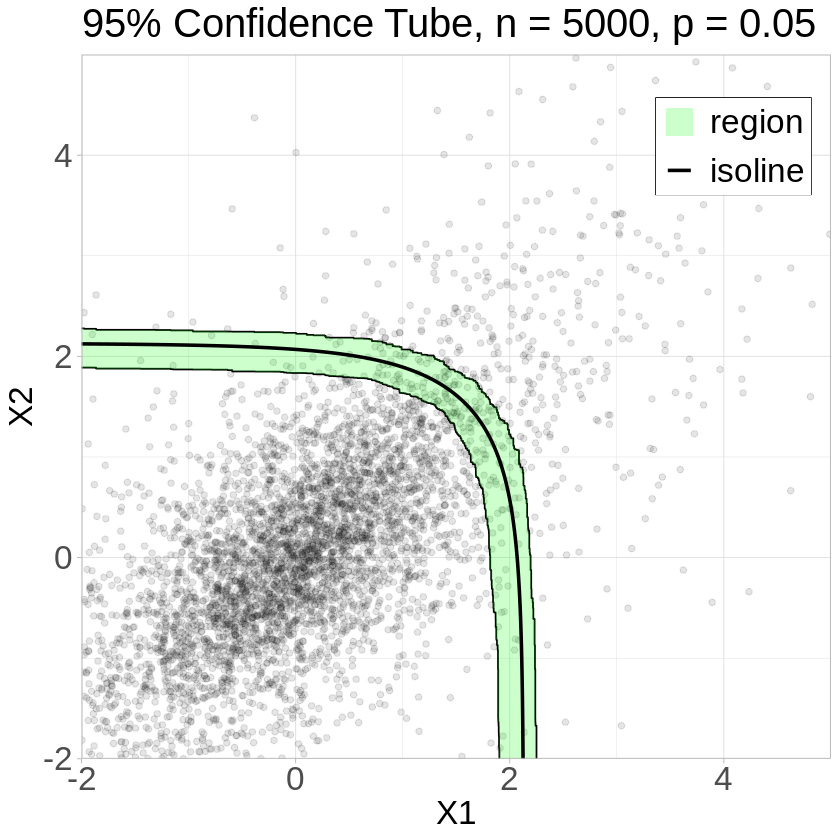

In [394]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

plt <- ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_y_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='green')) +
scale_color_manual(values=c('isoline'='black')) +
ggtitle(paste0('95% Confidence Tube, n = ', n, ', p = ', p)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
     legend.text = element_text(size=20))

plt
ggsave('~/isolines_uq/plots/successful_cover.png', plt, width=7, height=7)

### Failed Cover

In [396]:
ind <- 108
path <- paste0(perlpath, '/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/5000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.05_alpha0.05'
isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(5,5), gridLbs=c(-2,-2), prob=0.05)

Warning message:
“Removed 490 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 490 rows containing missing values (`geom_point()`).”


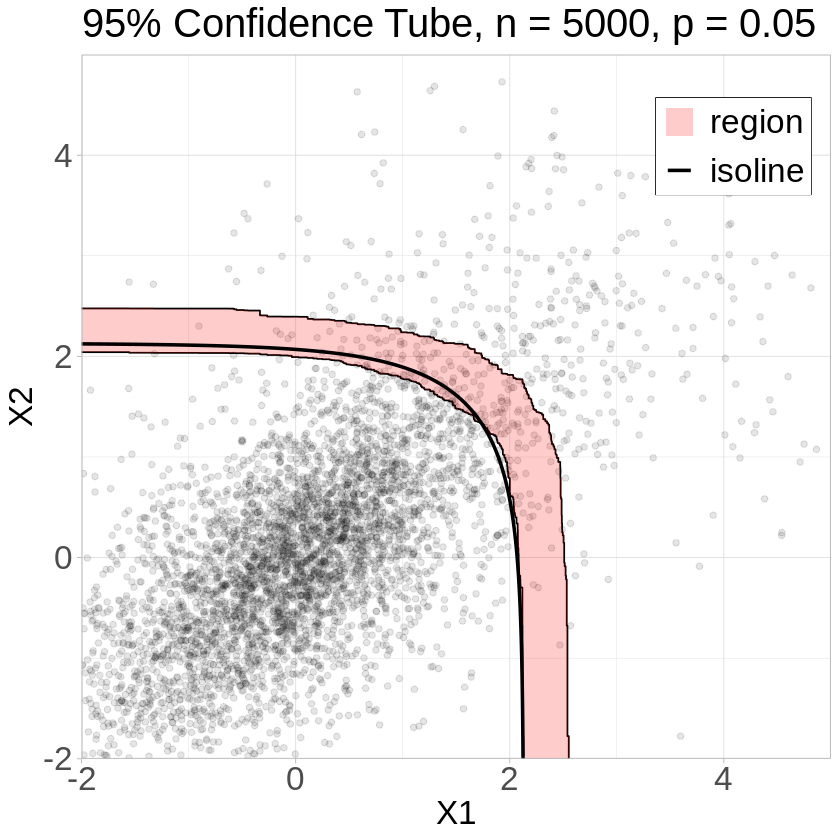

In [397]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

plt <- ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_y_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='red')) +
scale_color_manual(values=c('isoline'='black')) +
ggtitle(paste0('95% Confidence Tube, n = ', n, ', p = ', p)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
     legend.text = element_text(size=20))

plt
ggsave('~/isolines_uq/plots/failed_cover.png', plt, width=7, height=7)

## Simulation Results for Drawing Base Regions

In [5]:
# loading the dataframe of results
bivt_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/isolinenumCoords_500.RData')
bivt_res <- readRDS(bivt_path)
bivt_res$n <- as.integer(bivt_res$n)

res <- bivt_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

# alpha for 1-alpha binomial confidence intervals 
meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


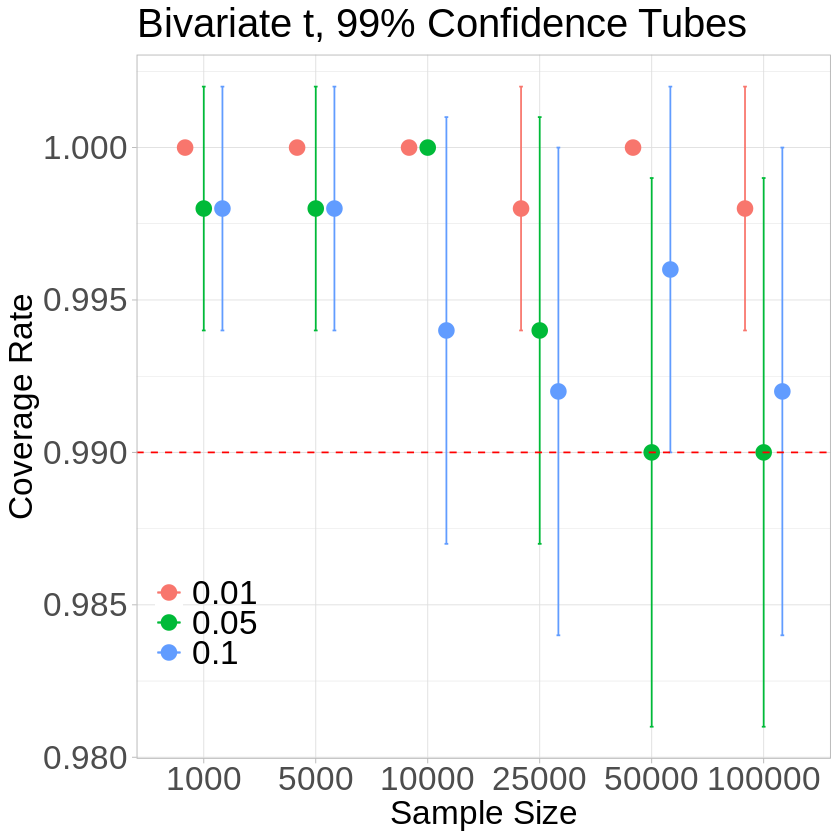

In [6]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.01
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Tubes')) + 
theme(legend.title = element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivt99_base_res.png', plt)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


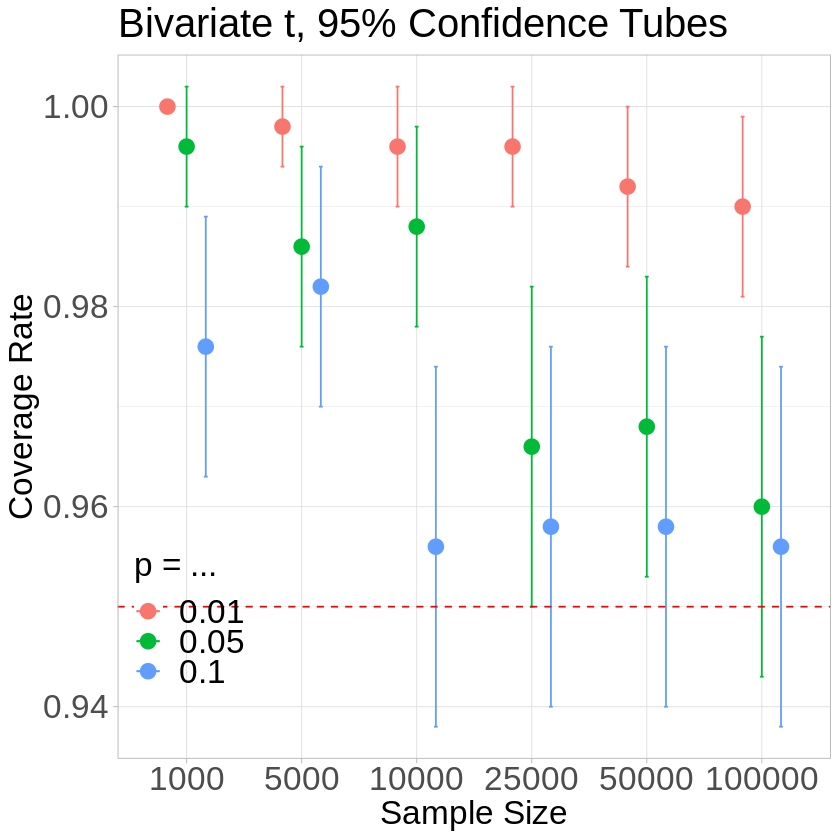

In [13]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.05
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Tubes')) + 
labs(color = 'p = ...') +
theme(legend.title = element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivt95_base_res.png', plt)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


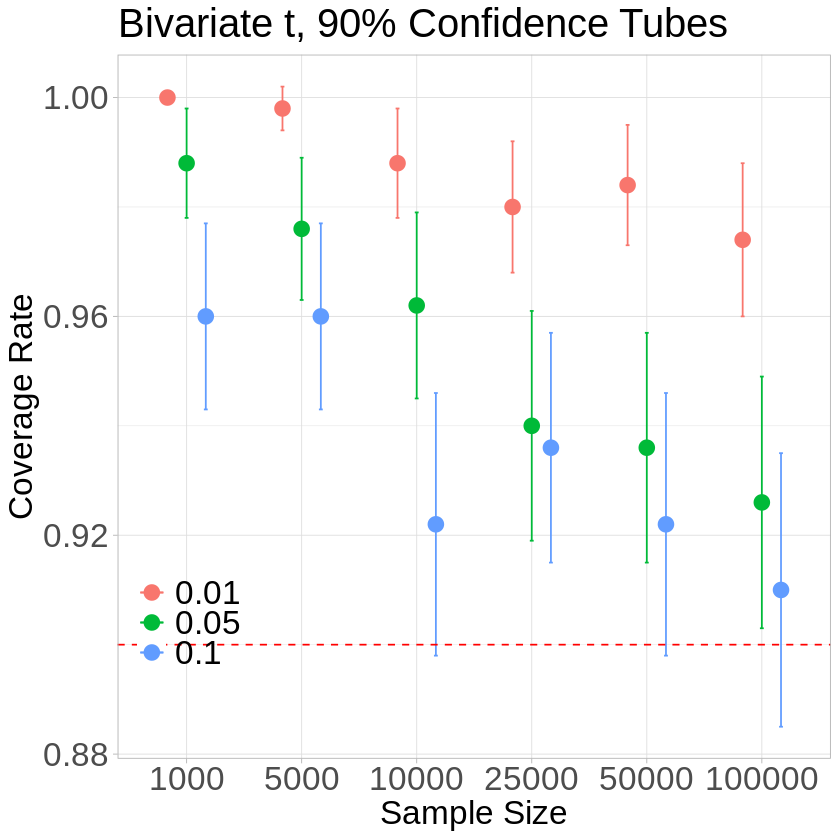

In [333]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.1
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Tubes')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivt90_base_res.png', plt)

In [14]:
# loading the dataframe of results
bivgauss_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/bivgauss/400x400_on_[-1,3]x[-1,3]/isolinenumCoords_500.RData')
bivgauss_res <- readRDS(bivgauss_path)
bivgauss_res$n <- as.integer(bivgauss_res$n)

res <- bivgauss_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


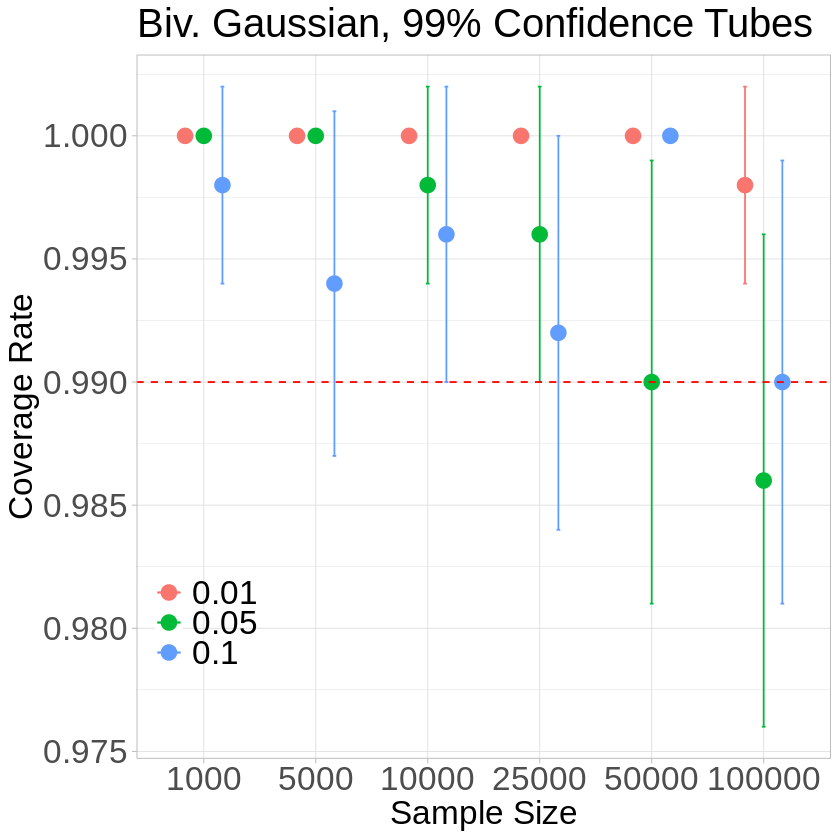

In [15]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.01
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Biv. Gaussian, ', (1-a)*100, '% Confidence Tubes')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivgauss99_base_res.png', plt)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


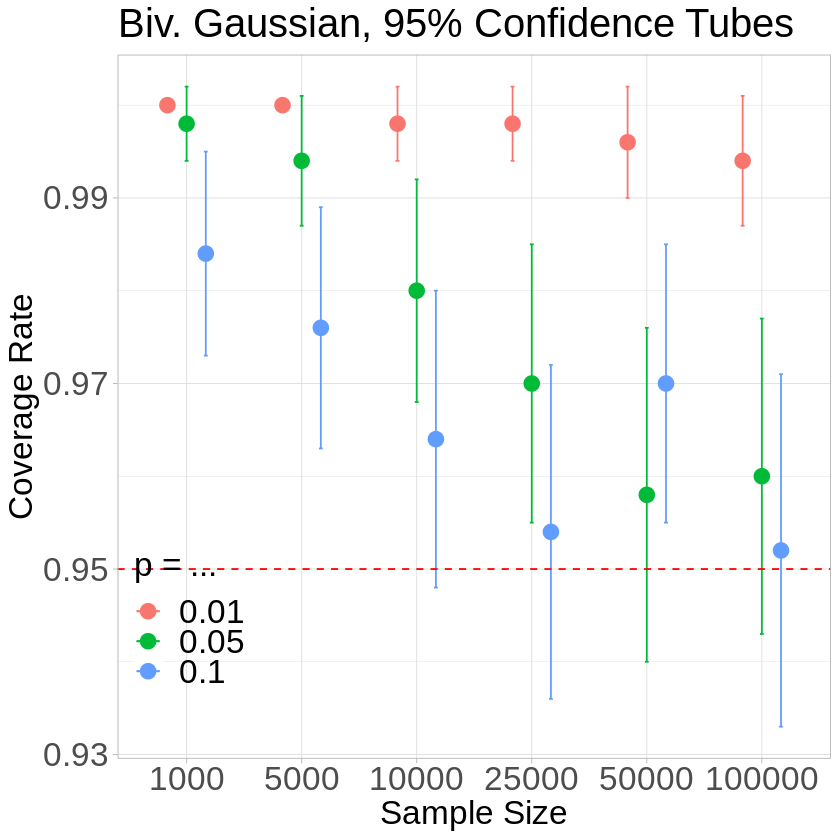

In [16]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.05
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Biv. Gaussian, ', (1-a)*100, '% Confidence Tubes')) + 
labs(color = 'p = ...') +
theme(legend.title = element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivgauss95_base_res.png', plt)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


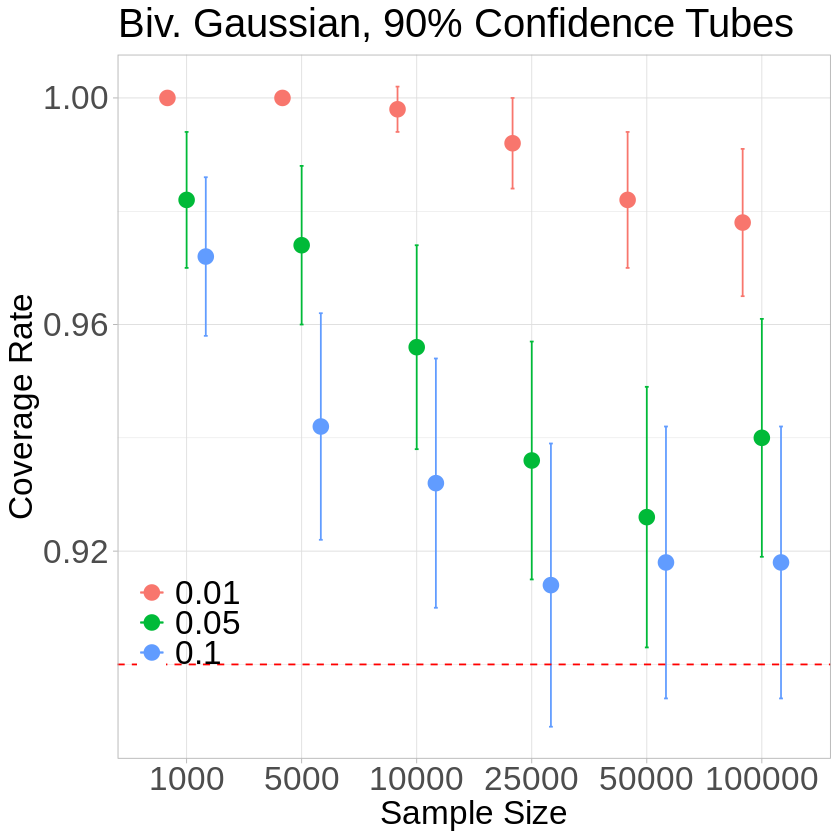

In [340]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.1
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Biv. Gaussian, ', (1-a)*100, '% Confidence Tubes')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivgauss90_base_res.png', plt)

In [17]:
# loading the dataframe of results
bivkarachi_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/karachi/400x400_on_[50,140]x[0,100]/isolinenumCoords_500.RData')
bivkarachi_res <- readRDS(bivkarachi_path)
bivkarachi_res$n <- as.integer(bivkarachi_res$n)

res <- bivkarachi_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


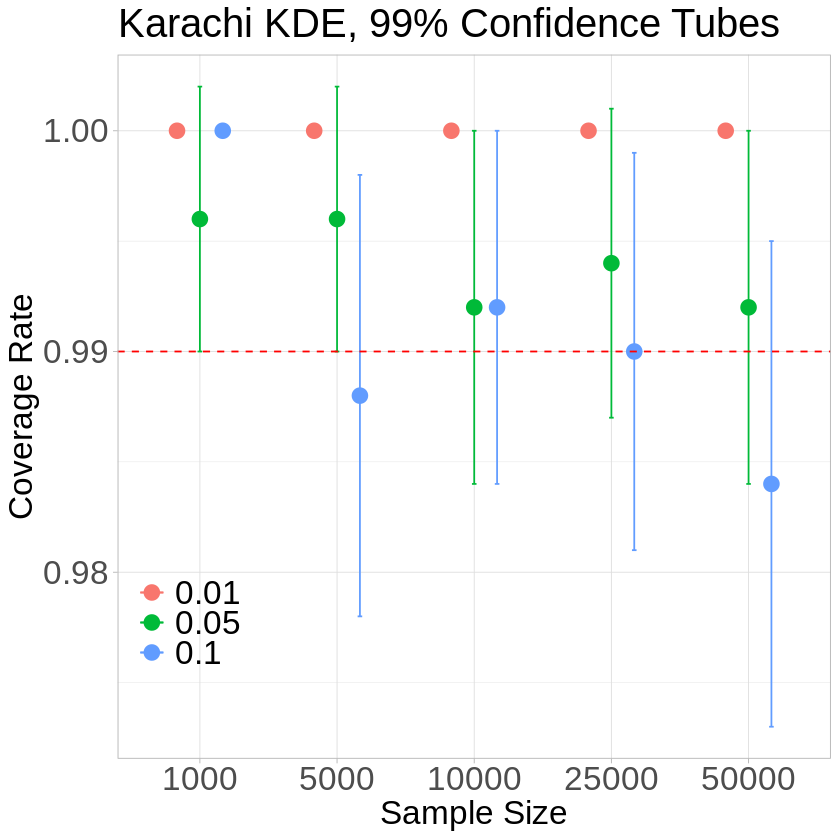

In [18]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.01
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi KDE, ', (1-a)*100, '% Confidence Tubes')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivkarachi99_base_res.png', plt)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


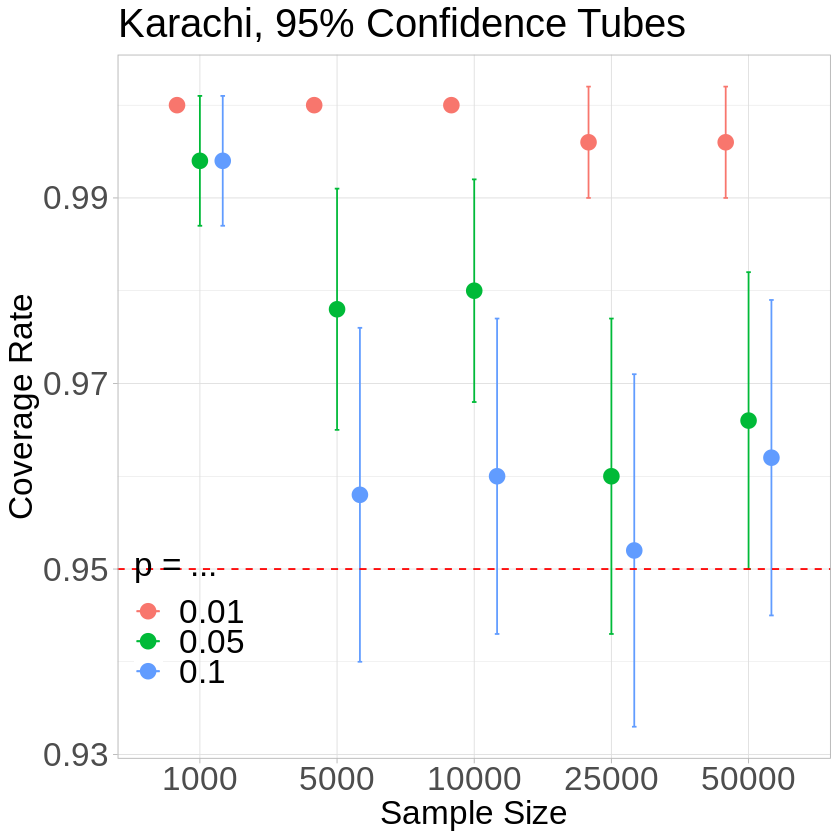

In [19]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.05
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, ', (1-a)*100, '% Confidence Tubes')) + 
labs(color = 'p = ...') +
theme(legend.title = element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivkarachi95_base_res.png', plt)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Saving 6.67 x 6.67 in image
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


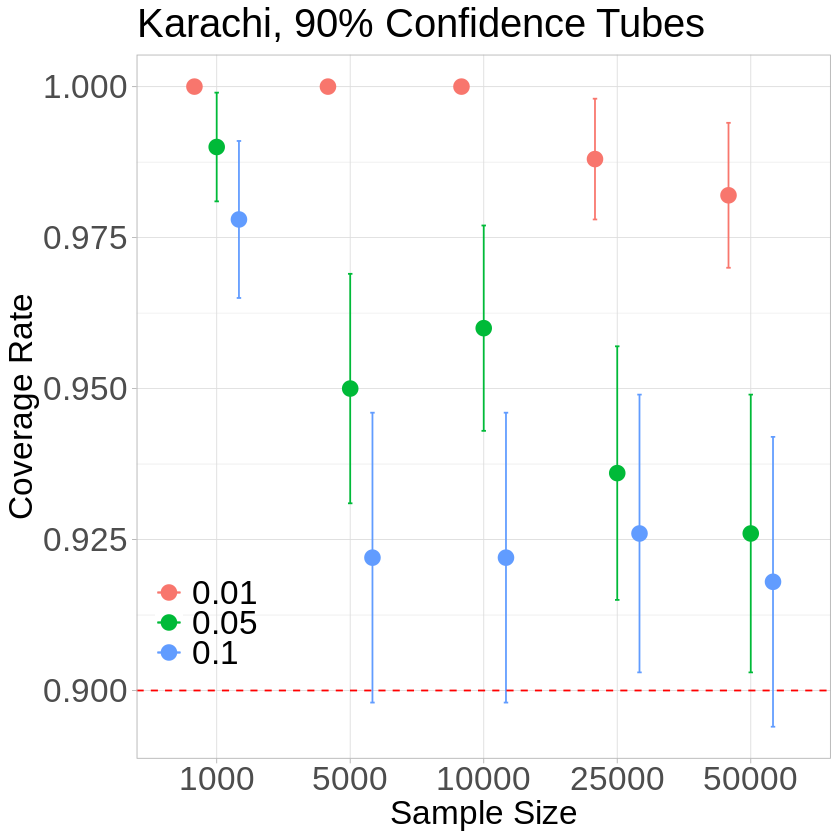

In [375]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.1
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, ', (1-a)*100, '% Confidence Tubes')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt
ggsave('~/isolines_uq/plots/bivkarachi90_base_res.png', plt)

## Bad Results for Naive Cooley Projection

In [408]:
path <- paste0(perlpath, '/sims/regions/proj_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.001/isolinenumCoords_500.RData')
res <- readRDS(path)

res <- res %>% 
group_by(n, alpha, base_p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'base_p'. You can override
using the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


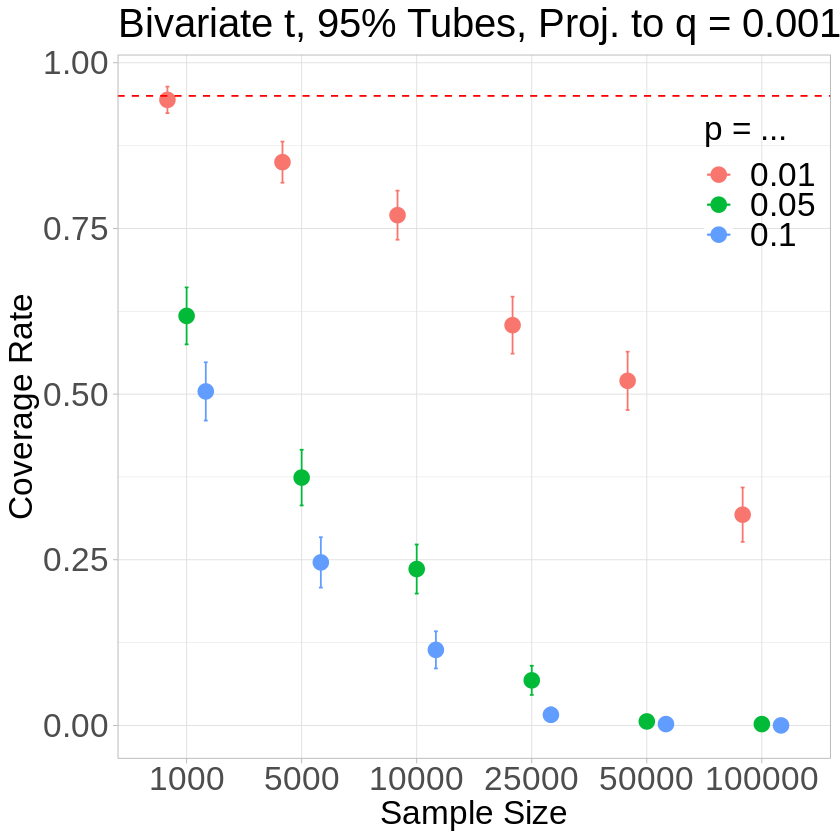

In [410]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)
a <- 0.05
plt <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Tubes, Proj. to q = 0.001')) +
labs(color = 'p = ...') +
theme(legend.title = element_text(size = 20), legend.position=c(0.90,0.82), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24), legend.text = element_text(size=20))

plt
ggsave('~/isolines_uq/plots/failed_rates.png', plt, width=7.5, height=7)

### What's Going Wrong?

In [413]:
path <- '/pscratch/sd/j/jbbutler/sims/regions/proj_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.001/50000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_22.RData'
confregs <- readRDS(path)
path <- '/pscratch/sd/j/jbbutler/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/50000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_22.RData'
obj <- readRDS(path)
confreg_lab <- 'beta0.5_p0.05_alpha0.05'

data <- obj[['beta0.5_p0.01_alpha0.01']]$data

isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(10,10), gridLbs=c(-1,-1), prob=0.001)

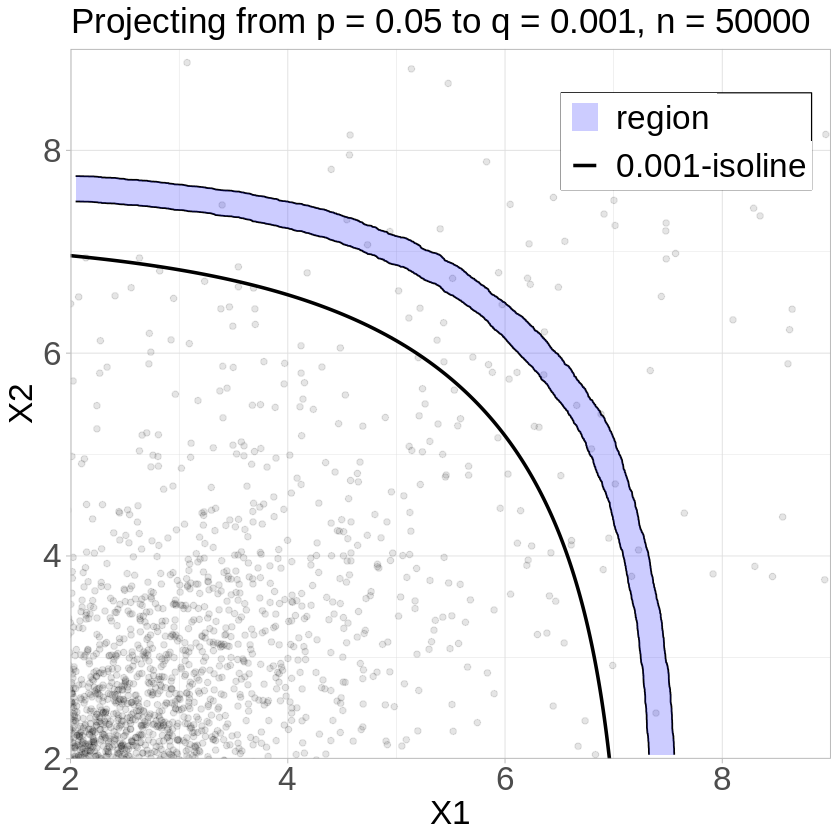

In [414]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

plt <- ggplot() + geom_point(data=data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='0.001-isoline'), size=1) +
coord_cartesian(ylim=c(2, 9), xlim = c(2, 9), expand=0) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('0.001-isoline'='black')) +
ggtitle(paste0('Projecting from p = 0.05 to q = 0.001, n = 50000')) +
theme_light() + 
theme(legend.position = c(0.81, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=21),
      legend.text = element_text(size=20))

plt
ggsave('~/isolines_uq/plots/failed_projected_example.png', plt, height=7, width=7)

## We Can't Stop with Mammen and Polonik's Method, Need EVT/Cooley

In [430]:
p <- 0.0005

lbs <- c(50, 0)
ubs <- c(140, 100)
gticks <- 400 
grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

base_out <- drawBaseRegions(karachi_data, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)
base_out <- base_out[[1]]

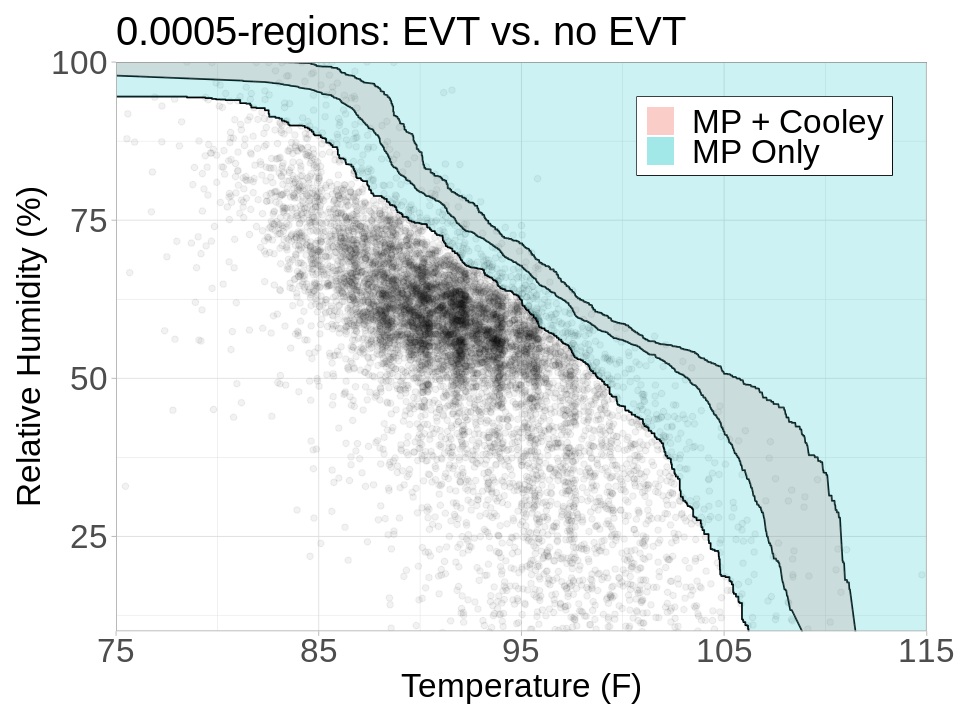

In [442]:
options(repr.plot.width=8, repr.plot.height=6, scipen=999)

polygon1 <- rbind(base_out[[1]], 
                 data.frame(t(rev(data.frame(t(base_out[[2]]))))))

n <- nrow(base_out$data)
p <- base_out$p
alpha <- base_out$alpha

plt <- ggplot() + geom_point(data=base_out$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=base_out[[1]], aes(x=X1, y=X2)) +
geom_line(data=base_out[[2]], aes(x=X1, y=X2)) +
geom_line(data=proj_out[[3]], aes(x=X1, y=X2)) +
geom_line(data=proj_out[[4]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon2, aes(x=X1, y=X2, fill='MP + Cooley'), alpha=0.2) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='MP Only'), alpha=0.2) +
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115), expand=0) +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + 
ggtitle('0.0005-regions: EVT vs. no EVT') +
theme_light() +
theme(legend.position = c(0.80, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      legend.text = element_text(size = 20),
      plot.title = element_text(size=24),
      plot.margin = margin(10,20,10,10))

plt
ggsave('~/isolines_uq/plots/evt_necessary.png', plt, height=6, width=8)

## Assuming we get it to work, what could we do?

In [386]:
dat_past <- data.frame(rmvt(5000, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
dat_future <- data.frame(rmvt(5000, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 3))

In [387]:
p <- 0.05
q <- 0.005

lbs <- c(-2,-2)
ubs <- c(5,5)
gticks <- 400

grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

In [388]:
past_base_region <- drawBaseRegions(dat_past, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)


In [389]:
future_base_region <- drawBaseRegions(dat_future, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)


In [73]:
pbr <- past_base_region[[1]]
fbr <- future_base_region[[1]]

In [74]:
past_proj_region <- projectBaseRegion(pbr, proj_p=q, asympIndep=FALSE)

In [75]:
future_proj_region <- projectBaseRegion(fbr, proj_p=q, asympIndep=FALSE)

In [76]:
ppr <- past_proj_region
fpr <- future_proj_region

Saving 6.67 x 6.67 in image


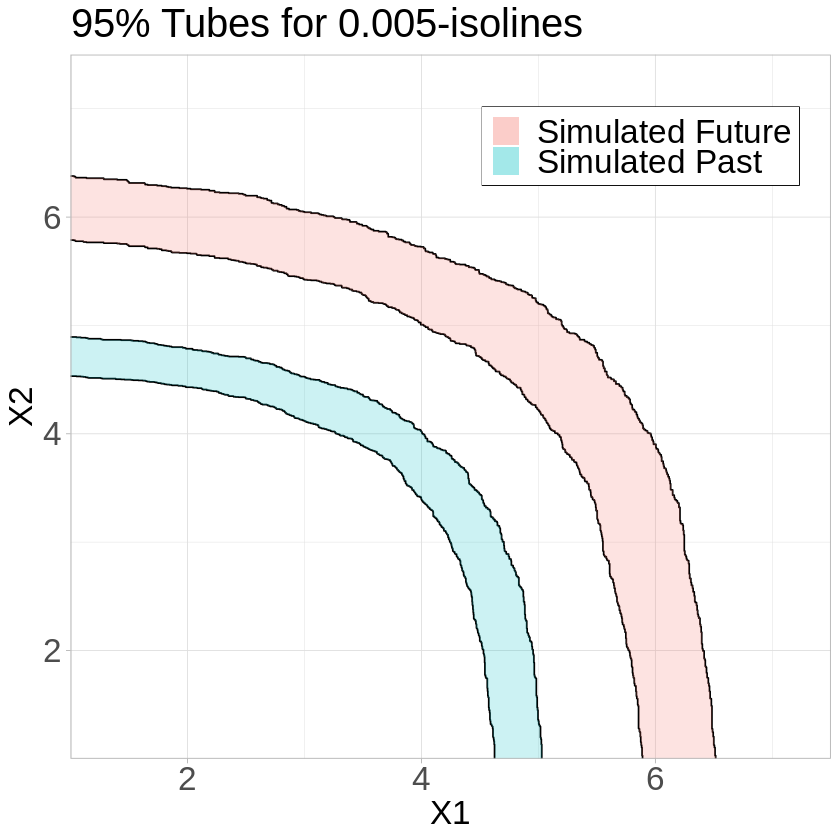

In [390]:
options(repr.plot.width=7, repr.plot.height=7)

polygon1 <- rbind(ppr[[3]], 
                 data.frame(t(rev(data.frame(t(ppr[[4]]))))))
polygon2 <- rbind(fpr[[3]], 
                 data.frame(t(rev(data.frame(t(fpr[[4]]))))))

plt <- ggplot() + 
geom_line(data=ppr[[3]], aes(x=X1, y=X2)) +
geom_line(data=ppr[[4]], aes(x=X1, y=X2)) +
geom_line(data=fpr[[3]], aes(x=X1, y=X2)) +
geom_line(data=fpr[[4]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon2, aes(x=X1, y=X2, fill='Simulated Future'), alpha=0.2) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='Simulated Past'), alpha=0.2) +
coord_cartesian(ylim=c(1, 7.5), xlim = c(1, 7.5), expand=0) +
xlab('X1') + ylab('X2') + 
ggtitle('95% Tubes for 0.005-isolines') +
theme_light() +
theme(legend.position = c(0.75, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20))

plt
ggsave('~/isolines_uq/plots/future_application.png', plt)